In [5]:
import cv2
import os.path
import os
import sys
import numpy as np
from numpy import genfromtxt
import pandas as pd
import tensorflow as tf
import tqdm
import re
import pickle

from keras import regularizers

from random import randint

from keras.models import Sequential
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate 
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
from keras.engine.topology import Layer
from keras import backend as K
from keras.models import load_model
from keras.optimizers import Adam

import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
import mtcnn
sys.path.append('..')
from utils import get_face, l2_normalizer, normalize, save_pickle, plt_show, get_encode
from PIL import Image
from mtcnn.mtcnn import MTCNN



In [7]:
mainpath = os.listdir('trainset/')
subpath = [ os.listdir('trainset/'+i) for i in mainpath ]
# total_classes = sum(subpath,[])
# total_classes[0:5]

In [8]:
# encoder_model = 'Attendance_Face_Recognition/model/facenet_keras.h5'
# people_dir = 'train/'
# encoding_path = 'encodings/encodings.pkl'

# recognition_t = 0.3
# required_size = (160,160)
# encoding_dict = dict()

In [9]:
new_ds = []
for i in mainpath:
    for j in os.listdir('trainset/'+i):
        p = 'trainset/'+i+"/"+j
        new_ds.append(p)

In [10]:
keyword = 'script'

In [11]:

def extract_face_as_array(impath): 
    image = Image.open(impath)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    
    # create the detector, using default weights
    ress = detect_face(pixels)
    return ress

def detect_face(f_arr):
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(f_arr)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = f_arr[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize((160,160))
    face_array = np.asarray(image)
    return face_array

In [ ]:
def img_to_encoding(image_path, model):
    image = cv2.imread(image_path, 1)
    image = cv2.resize(image, (96, 96)) 
    img = image[...,::-1]
    img = np.around(np.transpose(img, (2,0,1))/255.0, decimals=12)
    x_train = np.array([img])
    embedding = model.predict_on_batch(x_train)
    return embedding

In [27]:
# faceCascade = cv2.CascadeClassifier("assets/haarcascade_frontalface_default.xml")
# train_data = [[]]
# valid_data = [[]]
# # emp = []
# item_t=[0] * 600
# item_v=[0] * 600
# i1=0
# for i in tqdm.tqdm(new_ds):
#     print('Image ',i)
#     ind1 = 0
#     ind2 = 0
#     for j in os.listdir(i):
#         impath = i+"/"+j;
#         if(keyword in impath):
#             item_t[ind1]=impath
#             face_arr = extract_face_as_array(impath)
#             train_data[i1][ind1]=face_arr
#             ind1+=1;i1+=1
#         else:
#             item_v[ind2]=impath
#             face_arr = extract_face_as_array(impath)
#             valid_data[i1][ind2]=face_arr
#             ind2+=1;i1+=1
import siamese_net
model = model(input_shape = (3,96,96))
model.compile(optimizer = 'adam', loss = triplet_loss_function, metrics = ['accuracy'])
database = {}
for i in tqdm.tqdm(new_ds):
    for j in os.listdir(i):
        impath = i+'/'+j
        if(keyword in impath):
            identity = os.path.splitext(os.path.basename(j))[1]
            database[identity] = img_to_encoding(file, model)
print(database)


NameError: name 'model' is not defined

In [61]:
item_t[1]

'trainset/0001/0001_0000262/0001_0000262_script.jpg'

In [23]:

# path = 'mydataset'
# faceCascade = cv2.CascadeClassifier("assets/haarcascade_frontalface_default.xml")

# for i in new_ds:
#     index=1
#     x = i.split("/")
#     foldera = x[2]
#     os.chdir('train/')
#     os.mkdir(str(foldera))
#     os.chdir('../')
    
#     os.chdir('valid/')
#     os.mkdir(str(foldera))
#     os.chdir('../')
    
#     for j in os.listdir(i):
        
#         impath = i+"/"+j;
        
#         if(keyword in impath):
# #             print(impath)
#             img = cv2.imread(impath)
#             gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#             faces = faceCascade.detectMultiScale(
#             gray,
#             scaleFactor=1.3,
#             minNeighbors=3,
#             minSize=(30, 30)
#             )
# #             print("[INFO] Found {0} Faces.".format(len(faces)))
#             os.chdir('train/')
#             os.chdir(str(foldera))
#         # faces = faceCascade.detectMultiScale(img1, 1.1, 4)
            
#             for (x,y,w,h) in faces:
#                 sub_img=gray[y:y+h,x:x+w]
#                 cv2.imwrite(str(foldera)+str(index)+".jpg",sub_img)
                
#                 rs = cv2.imread(str(foldera)+str(index)+".jpg")
#                 os.remove(str(foldera)+str(index)+".jpg")
#                 rs = cv2.resize(rs,required_size)
#                 cv2.imwrite(str(foldera)+str(index)+".jpg",rs)
                
#             index+=1
#             os.chdir('../../')
        
#         else:
            
# #             print(impath)
#             img = cv2.imread(impath)
#             gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#             faces = faceCascade.detectMultiScale(
#             gray,
#             scaleFactor=1.3,
#             minNeighbors=3,
#             minSize=(30, 30)
#             )
# #             print("[INFO] Found {0} Faces.".format(len(faces)))
            
#             os.chdir('valid/')
#             os.chdir(str(foldera))
                
#             for (x,y,w,h) in faces:
#                 sub_img=gray[y:y+h,x:x+w]
#                 cv2.imwrite(str(foldera)+str(index)+".jpg",sub_img)
#                 rs = cv2.imread(str(foldera)+str(index)+".jpg")
#                 os.remove(str(foldera)+str(index)+".jpg")
#                 rs = cv2.resize(rs,required_size)
#                 cv2.imwrite(str(foldera)+str(index)+".jpg",rs)
#             index+=1
#             os.chdir('../../')

# os.chdir('../')

# #                 cv2.rectangle(img,(x-10,y-15),(x+w+10,y+h+10),(255,255,0),3)


[[],
 array([[[  1,   2,   6],
         [  1,   2,   6],
         [  1,   2,   7],
         ...,
         [  8,   9,  14],
         [ 10,  11,  15],
         [ 13,  14,  18]],
 
        [[  1,   2,   7],
         [  1,   2,   7],
         [  1,   2,   7],
         ...,
         [  7,   8,  12],
         [  8,   9,  13],
         [  8,   9,  13]],
 
        [[  1,   2,   8],
         [  1,   2,   8],
         [  1,   2,   8],
         ...,
         [  7,   8,  10],
         [  7,   8,  10],
         [  7,   8,  10]],
 
        ...,
 
        [[ 23,  98, 191],
         [ 23,  98, 191],
         [ 24,  99, 192],
         ...,
         [ 30, 107, 199],
         [ 30, 107, 199],
         [ 30, 107, 199]],
 
        [[ 23,  98, 191],
         [ 23,  98, 191],
         [ 24,  99, 192],
         ...,
         [ 30, 107, 199],
         [ 30, 107, 199],
         [ 30, 107, 199]],
 
        [[ 23,  98, 191],
         [ 23,  98, 191],
         [ 24,  99, 192],
         ...,
         [ 30, 107, 199

In [10]:
# def triplet_loss(y_true, y_pred, alpha = 0.2):
#     anchor, positive, negative = y_pred[0], y_pred[1], y_pred[2]
# #    
#     # triplet formula components
#     pos_dist = tf.reduce_sum( tf.square(tf.subtract(y_pred[0], y_pred[1])) )
#     neg_dist = tf.reduce_sum( tf.square(tf.subtract(y_pred[0], y_pred[2])) )
#     basic_loss = pos_dist - neg_dist + alpha
    
#     loss = tf.maximum(basic_loss, 0.0)
   
#     return loss
# os.chdir('Attendance_Face_Recognition/')

In [43]:
face_encoder = load_model('model/facenet_keras.h5')

In [106]:
left_input = train_data[1]
right_input = valid_data[1]
input_shape = (160,160,3) 
        # Convolutional Neural Network
model = Sequential()
model.add(Conv2D(64, (10,10), activation='relu', input_shape=input_shape,
                kernel_regularizer=regularizers.l2(2e-4)))
model.add(MaxPooling2D())
model.add(Conv2D(128, (7,7), activation='relu',
                kernel_regularizer=regularizers.l2(2e-4)))
model.add(MaxPooling2D())
model.add(Conv2D(128, (4,4), activation='relu', kernel_regularizer=regularizers.l2(2e-4)))

model.add(Flatten())
model.add(Dense(1024,activation='sigmoid',
               kernel_regularizer=regularizers.l2(1e-3),))

# Generate the encodings (feature vectors) for the two images
encoded_l = model(left_input)
encoded_r = model(right_input)

# Add a customized layer to compute the absolute difference between the encodings
L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
L1_distance = L1_layer([encoded_l, encoded_r])

# Add a dense layer with a sigmoid unit to generate the similarity score
prediction = Dense(1,activation='sigmoid',)(L1_distance)

# Connect the inputs with the outputs
siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)

# return the model
og_embedding = get_embedding(siamese_net,og_face)    
t_embedding = get_embedding(siamese_net,t_face)
# t_embedding2 = get_embedding(face_encoder,t_face2)
dist = np.linalg.norm(t_embedding-og_embedding)    
dist

ResourceExhaustedError: OOM when allocating tensor with shape[123008,1024] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:RandomUniform]

In [44]:
def get_embedding(model, face_pixels):               
    # scale pixel values
    face_pixels = face_pixels.astype('float32')
    # standardize pixel values across channels (global)
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean) / std
    # transform face into one sample
    samples = np.expand_dims(face_pixels, axis=0)
    # make prediction to get embedding
    yhat = model.predict(samples)
    return yhat[0]

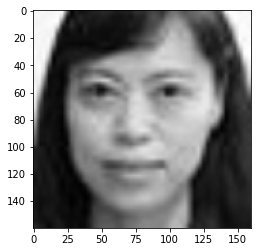

In [16]:
plt.imshow(og_face)

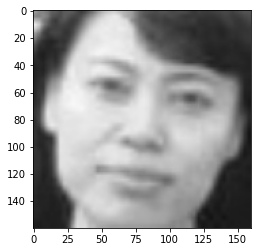

In [17]:
plt.imshow(t_face)

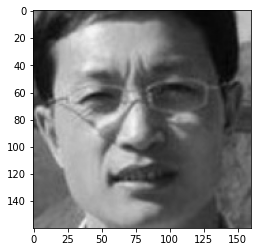

In [18]:
plt.imshow(t_face2)

In [94]:
og_face = train_data[7]
t_face = valid_data[178]
t_face2 = valid_data[25]

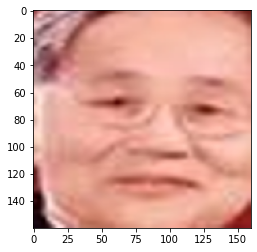

In [95]:
im1 = Image.fromarray(og_face)
plt.imshow(im1)

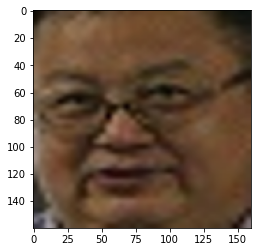

In [96]:
im2 = Image.fromarray(t_face)
plt.imshow(im2)

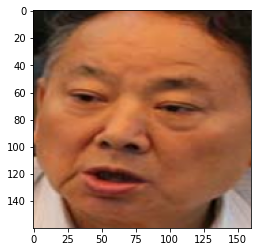

In [97]:
im3 = Image.fromarray(t_face2)
plt.imshow(im3)

In [98]:
og_embedding = get_embedding(face_encoder,og_face)    
t_embedding = get_embedding(face_encoder,t_face)
t_embedding2 = get_embedding(face_encoder,t_face2)
dist = np.linalg.norm(t_embedding-og_embedding)    
dist

In [99]:
dist = np.linalg.norm(t_embedding-og_embedding)    
dist

8.87989

In [100]:
dist2 = np.linalg.norm(t_embedding2-og_embedding)
dist2

9.947859

In [74]:
len(valid_data)

531

In [87]:
s_score = []
idofimg = []
index = 0
tf = []

o_face = train_data[7]
print("Original ",item_t[7])
# print('train/'+i+'/'+imgp1[0])
og_embedding = get_embedding(face_encoder,o_face)    
# for j in os.listdir('train/'):
#         imgp2 = os.listdir('train/'+j)
#         if(imgp2):
#             t_face =  extract_face_as_array('train/'+j+"/"+imgp2[0])
#             t_embedding = get_embedding(face_encoder,t_face)
#             idofimg.append(imgp2[0])
#             s_score.append(np.linalg.norm(t_embedding-og_embedding))  
#             print(np.linalg.norm(t_embedding-og_embedding))
#         else:
#             s_score.append(10)
            
for j in tqdm.tqdm(range(1,len(valid_data))):
        tf =  valid_data[j]
        t_embedding = get_embedding(face_encoder,tf)
#             idofimg.append(imgp2[0])
        s_score.append(np.linalg.norm(t_embedding-og_embedding))  
#             print(np.linalg.norm(t_embedding-og_embedding))    
        
    

  0%|▎                                                                                 | 2/530 [00:00<00:29, 18.06it/s]

Original  trainset/0001/0001_0000274/0001_0000274_script_2.jpg


100%|████████████████████████████████████████████████████████████████████████████████| 530/530 [00:34<00:00, 15.34it/s]


In [90]:
s_score.remove(min(s_score))
s_score.index(min(s_score))


178

In [91]:
# idofimg[1]
item_v[178]

'trainset/0005/0005_0000475/0000010.jpg'

In [71]:
df = pd.DataFrame(s_score)

In [72]:
df.describe()

,0
count,1012.000000
mean,12.215450
std,1.381125
min,6.572620
25%,11.303306
50%,12.230958
75%,13.159082
max,16.310265
